In [1]:
# Setup the library
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import numpy as np
import math

top_level=f'{os.getcwd()}/../../..'
pr.addLibraryPath( f'{top_level}/scripts' )
import setupLibPaths
import epix_hr_single_10k

In [2]:
# Create and start the root class
root = epix_hr_single_10k.Root(
    top_level   = top_level,
    sim         = True,
    dev         = '/dev/datadev_1',
    asicVersion = 4,
    pollEn      = False
)
root.start()

Simulation mode : True
justCtrl mode : False
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)


In [3]:
# Create useful pointers
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

###################################################
#             Firmware Version                    #
###################################################
Path         = ePixHr10kT.Core.AxiVersion
FwVersion    = 0x3010000
UpTime       = 0:00:00
GitHash      = dirty (uncommitted code)
XilinxDnaId  = 0x400000000000000000000001
FwTarget     = EpixHr10kTLclsIITiming
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv408 (CentOS Linux 7 (Core))
BuildDate    = Fri Nov 22 14:04:42 PST 2024
Builder      = ddoering
###################################################


In [4]:
#Initialze the camera
#[routine, asic0, asic1, asic2, asic3]'
root.EpixHR.InitASIC([4,0,0,0,0])
#points to the ASIC device under test
root.EpixHR.PacketRegisters0.asicDataReq.set(145)
root.EpixHR.PacketRegisters1.asicDataReq.set(145)
root.EpixHR.PacketRegisters0.DisableLane.set(0xfff)
root.EpixHR.PacketRegisters0.EnumerateDisLane.set(0)

Rysync ASIC started
Init ASIC script started
Loading MMCM configuration
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../../yml/ePixHr10kT_MMCM_320MHz.yml
Completed
Loading supply configuration
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../../yml/ePixHr10kT_PowerSupply_Enable.yml
Loading register control (waveforms) configuration
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../../yml/ePixHr10kT_RegisterControl_24us_248MHz.yml
Loading packet registers
Disabling packet lanes for ASIC 0
Disabling packet lanes for ASIC 1
Disabling packet lanes for ASIC 2
Disabling packet lanes for ASIC 3
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../../yml/ePixHr10kT_PacketRegisters.yml
Taking asic off of reset
Loading ASIC and timing configuration
Loading Trigger settings
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../../yml/ePix

In [5]:
root.EpixHR.BatcherEventBuilder2.Bypass.set(1)
root.EpixHR.BatcherEventBuilder2.Blowoff.set(False)


In [6]:
root.EpixHR.TriggerRegisters.StopTriggers()

Stop Triggers command executed


In [7]:
imgRows = 145
imgCols = 384
darkHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*10
darkHigh[:, 10] = np.arange(imgRows)
darkHigh[:,300] = np.arange(imgRows)
darkHigh[0, :] = np.arange(384)
darkHigh[10, :] = np.arange(384)
darkHigh[100, :] = np.arange(384)
darkHigh[110, :] = np.arange(384)
gainHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
darkLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*0
gainLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*0

calibParams = root.dummyGen0.setCalibArray(gainLow,darkLow,gainHigh,darkHigh)
root.dummyGen0.testImage = calibParams

In [8]:
root.EpixHR.TriggerRegisters.StopTriggers()
#time.sleep(1)
#HLS
root.EpixHR.DataCorrectionHLS.enable.set(True)
#root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(1)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
# sending frame twice enable calib write
root.dummyGen0.SendCalibFrame()
#time.sleep(5)
#root.dummyGen0.SendCalibFrame()
#root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(2)
# sending fram after enables raw data in
#root.dummyGen0.SendCalibFrame()

Stop Triggers command executed
0
1
ibFrame.getPayload() = 445440
obFrame.getPayload() = 445472


In [12]:
len(root.dummyGen1._fullData[32:])

445440

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

[]

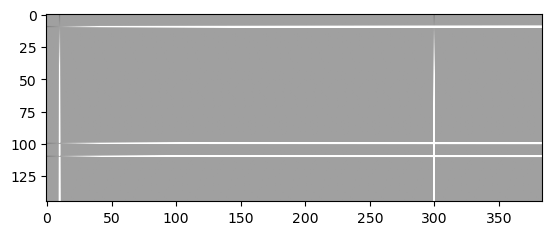

In [33]:
import struct
result = np.zeros((imgRows,imgCols),dtype=np.uint64)
for i in range(145):
    for j in range (384):
        result[i,j] = struct.unpack('<Q', root.dummyGen1._fullData[16+(i*384*8+j*8):24+(i*384*8+j*8)])[0]
print(result.astype(np.uint16)[0,:])
plt.figure()
plt.imshow(result, cmap='gray', vmin=-40, vmax=40)
plt.plot()

In [ ]:
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get()

In [ ]:
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(2)

#use system with batcher and missing ASICs
root.EpixHR.SspLowSpeedDecoderReg.enable.set(True)
print ("Locked lanes: %x" % root.EpixHR.SspLowSpeedDecoderReg.Locked.get())
#Only ASIC 1 is available so disable the 6 lower lanes
#root.EpixHR.PacketRegisters0.DisableLane.set(0x3FF)
#root.EpixHR.PacketRegisters1.DisableLane.set(0xFC0)
#using internal triggers, so bypassing timing channel at the batcher 
root.EpixHR.BatcherEventBuilder0.Bypass.set(1)
root.EpixHR.BatcherEventBuilder1.Bypass.set(1)

root.EpixHR.PacketRegisters0.DisableLane.set(0)
root.EpixHR.PacketRegisters1.DisableLane.set(0)
root.EpixHR.RegisterControl.SR0Width1.set(24200)

#Need to confirm clock used for trigger, R0, ACQ and SRO
#Configure waveforms to be 12 and 24 us


root.EpixHR.TriggerRegisters.StopTriggers()
root.EpixHR.RegisterControl.preProcCrtl.set(1);
root.EpixHR.RegisterControl.preProcCrtl.set(0);

In [ ]:
root.EpixHR.TriggerRegisters.SetAutoTrigger(4000)
root.EpixHR.TriggerRegisters.StartAutoTrigger()

In [ ]:
print(root.DataReceiver0.FrameCount.get())
dark = root.DataReceiver0.Data.get()
print(dark.shape)
plt.figure()
plt.imshow(dark, cmap='gray', vmin=0, vmax=20)
plt.plot()

plt.figure()
pre = root.DataReceiver2.Data.get().astype(np.int16)
print(dark.shape)
dark.shape
plt.imshow(pre, cmap='gray', vmin=-40, vmax=40)
plt.plot()
print(pre[0,:])
print(pre[72,:])

In [ ]:
plt.figure()
pre = root.DataReceiver2.Data.get().astype(np.int16)
print(pre.shape)
dark.shape
plt.imshow(pre, cmap='gray', vmin=-40, vmax=40)
plt.plot()
#print(pre[0,:])
#print(pre[72,:])

In [ ]:
root.EpixHR.PacketRegisters0.EnumerateDisLane.set(0xfff)

In [ ]:
print(root.DataReceiver0.FrameCount.get())
dark = root.DataReceiver0.Data.get()
print(dark.shape)
plt.figure()
plt.imshow(dark, cmap='gray', vmin=0, vmax=20)
plt.plot()

plt.figure()
pre = root.DataReceiver2.Data.get().astype(np.int16)
print(dark.shape)
dark.shape
plt.imshow(pre, cmap='gray', vmin=-400, vmax=20)
plt.plot()

# Helper functions

In [ ]:
def run_asic_test():
    if os.path.isfile(f'{filename}'):   
        os.remove(f'{filename}')    
    print(filename)
    # Setup and open the file writer
    writer = root.dataWriter._writer
    writer.open(f'{filename}')

    # Wait for the file write to open the file
    while( writer.isOpen() is False):
        time.sleep(0.1)

    # Wait a little bit for the file to open up
    time.sleep(1.0)    

    #sets TriggerRegisters
    AcqCount = root.EpixHR.TriggerRegisters.AcqCount.get()
    print("Aquisition Counter " + str(AcqCount))
    root.EpixHR.TriggerRegisters.AutoTrigPeriod.set(50000) #in steps of 10ns
    root.EpixHR.TriggerRegisters.AutoRunEn.set(True)
    root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
    #wait for the camera to get thermally stable
    time.sleep(5.0)    
    root.EpixHR.TriggerRegisters.AutoDaqEn.set(True)
    root.EpixHR.TriggerRegisters.DaqTriggerEnable.set(True)
    initialFrameCounter = writer.getFrameCount()
    # Wait for the file write noise data
    while(writer.getFrameCount() < initialFrameCounter + 4000):
        print( f'Number of frames received: {writer.getFrameCount()}' )
        time.sleep(1)

    # stops triggers
    root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
    time.sleep(0.1)

    # Print the status
    DeltaAcqCount = root.EpixHR.TriggerRegisters.AcqCount.get() - AcqCount
    #print( f'Delta Aquisition Counter: {DeltaAcqCount}')
    print( f'Number of frames received: {writer.getFrameCount()}' )

    # Close the file writer
    writer.close()

    # Wait for the file write to close the file
    while( writer.isOpen() is True):
        time.sleep(0.1)

    ########################################################################################################################3
    f = open(filename, mode = 'rb')
    imgDesc = []
    for i in range(1):
        print("Starting to get data set %d" % (i))
        allFrames = currentCam.getData(f,16)
        imgDesc2 = currentCam.getDescImaData(allFrames)
        if i == 0:
            headers = allFrames[:,0:6]
            imgDesc = imgDesc2
        if i == 1: #skips the first dataset
            headers = allFrames[:,0:6]
            imgDesc = imgDesc2
        else:
            headers = np.concatenate((headers, allFrames[:,0:6]),0)
            imgDesc = np.concatenate((imgDesc, imgDesc2),0)
        if allFrames.shape[0] != MAX_NUMBER_OF_FRAMES_PER_BATCH:
            break


    numberOfFrames = allFrames.shape[0]
    print(allFrames.shape)
    ###########################################################################################################################
    return imgDesc


In [ ]:
def noise_print(offset = 0):
    print(imgDesc[100].shape)
    hg_n  = imgDesc[:,:,offset:offset+192].astype('float64')
    hg_n -= np.median(hg_n, axis=0, keepdims=True)
    hg_n -= np.median(hg_n, axis=(1,2), keepdims=True)
    hg_n -= np.median(hg_n, axis=2, keepdims=True) # rows (cols)
    hg_n -= np.median(hg_n, axis=1, keepdims=True) # cols (rows)
    imgDescCMC = hg_n
    noiseMap = np.std(imgDescCMC,0)
    darkAvg  = np.mean(imgDesc,0)
    
    #noiseMap = np.std(imgDesc[:,:,offset:offset+192],0)
    #darkAvg  = np.mean(imgDesc[:,:,192:384],0)
    medianNoise = np.median(noiseMap)
    plt.figure(1,figsize=(12,8),dpi=150)
    plt.imshow(noiseMap, cmap='gray', vmin=0, vmax=100)
    plt.colorbar(location='right', anchor=(0, 0.3), shrink=0.7)

    plt.figure(2,figsize=(12,8),dpi=150)
    dataset = noiseMap
    plt.hist(dataset.reshape(-1), bins=100, label=f'\nNoise Map distribution AHL, Avg. Dark level w/o CMC %d, Mediam Noise %d' % (np.mean(np.mean(darkAvg)), medianNoise)) 
    plt.yscale('log')
    plt.title("histogram") 
    plt.legend()
    plt.show()
    print()
    return noiseMap, darkAvg

# Pixel Optimizaion

In [ ]:
def setPixel (Preamp = 4, Vld1_b = 1, Pixel_CB = 4, Filter_DAC = 38, VRef_DAC = 53):
    ASIC.Preamp.set(Preamp)
    ASIC.Vld1_b.set(Vld1_b)
    ASIC.Pixel_CB.set(Pixel_CB)
    ASIC.Filter_DAC.set(Filter_DAC)
    ASIC.VRef_DAC.set(VRef_DAC)


    print('Preamp', ASIC.Preamp.get())
    print('Vld1_b',ASIC.Vld1_b.get())
    print('Pixel_CB',ASIC.Pixel_CB.get())
    print('Filter_DAC',ASIC.Filter_DAC.get())
    print('VRef_DAC',ASIC.VRef_DAC.get())

In [ ]:
MAX_NUMBER_OF_FRAMES_PER_BATCH  = 1000
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)

PreampList = [7,6,5,4,3,2,1,0]
Vld1_b = 0
Pixel_CB= 7
Filter_DAC= 17
VRef_DAC = 58

for Preamp in PreampList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)

Preamp = 7
Vld1_bList = [0, 1, 2, 3]
Pixel_CB= 7
Filter_DAC= 17
VRef_DAC = 58

for Vld1_b in Vld1_bList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)

Preamp = 7
Vld1_b = 0
Pixel_CBList= [7,6,5,4,3,2,1,0]
Filter_DAC= 17
VRef_DAC = 58

for Pixel_CB in Pixel_CBList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)

Preamp = 7
Vld1_b = 0
Pixel_CB= 7
Filter_DACList=[7, 13, 15, 17, 19, 21, 27, 37, 47, 57]
VRef_DAC = 58

for Filter_DAC in Filter_DACList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
Preamp = 7
Vld1_b = 0
Pixel_CB= 7
Filter_DAC= 17
VRef_DACList =[3, 13, 23, 33, 43, 48, 53, 58, 63]

for VRef_DAC in VRef_DACList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

# ADC Optimizaion

In [ ]:
#Set pixels back to default value
ASIC.Preamp.set(4)
ASIC.Vld1_b.set(1)
ASIC.Pixel_CB.set(4)
ASIC.Filter_DAC.set(38)
ASIC.VRef_DAC.set(53)

print('Preamp', ASIC.Preamp.get())
print('Vld1_b',ASIC.Vld1_b.get())
print('Pixel_CB',ASIC.Pixel_CB.get())
print('Filter_DAC',ASIC.Filter_DAC.get())
print('VRef_DAC',ASIC.VRef_DAC.get())

In [ ]:
def setADC (RefGenB = 3, RefGenC = 2, S2D_1_b = 0, shvc_DAC = 23, S2dDacBias = 3):
    ASIC.RefGenB.set(RefGenB) #2 bits
    ASIC.RefGenC.set(RefGenC) #2 bits
    ASIC.S2D_1_b.set(S2D_1_b) #3 bits
    ASIC.shvc_DAC.set(shvc_DAC) #6 bits
    ASIC.S2dDacBias.set(S2dDacBias)
    
    print('RefGenB', ASIC.RefGenB.get())
    print('RefGenC',ASIC.RefGenC.get())
    print('S2D_1_b',ASIC.S2D_1_b.get())
    print('shvc_DAC',ASIC.shvc_DAC.get())
    print('S2dDacBias',ASIC.S2dDacBias.get())

In [ ]:
RefGenBList = [0, 1, 2, 3]
RefGenC = 2
S2D_1_b = 0
shvc_DAC = 23
S2dDacBias = 3
for RefGenB in RefGenBList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_RefGenB_%d_All_run1.dat' % RefGenB)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()



In [ ]:
RefGenB = 3
RefGenCList = [0, 1, 2, 3]
S2D_1_b = 0
shvc_DAC = 23
S2dDacBias = 3
for RefGenC in RefGenCList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_RefGenC_%d_All_run1.dat' % RefGenC)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()


In [ ]:
RefGenB = 3
RefGenC = 2
S2D_1_bList = [0, 1, 2, 3, 4, 5, 6, 7]
shvc_DAC = 23
S2dDacBias = 3
for S2D_1_b in S2D_1_bList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_S2D_1_b_%d_All_run1.dat' % S2D_1_b)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
RefGenB = 3
RefGenC = 2
S2D_1_b = 0
shvc_DACList = [3, 13, 23, 33, 43, 53, 63]
S2dDacBias = 3
for shvc_DAC in shvc_DACList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_shvc_DAC_%d_All_run1.dat' % shvc_DAC)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
RefGenB = 3
RefGenC = 2
S2D_1_b = 0
shvc_DAC = 23
S2dDacBiasList = [0, 1, 2, 3, 4, 5, 6, 7]
for S2dDacBias in S2dDacBiasList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_S2dDacBias_%d_All_run1.dat' % S2dDacBias)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

# Custom settings, repeat latest 10kA

In [ ]:
Preamp = 4
Vld1_b = 1
Pixel_CB= 4
Filter_DAC=17
VRef_DAC =19


setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

######################################################################################################################
# Remove previous dataset
filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_10ka_settings_All_run1.dat')
########################################################################################################################
imgDesc = run_asic_test()
########################################################################################################################
[noiseMap, darkAvg] = noise_print()


In [ ]:
Preamp = 6
Vld1_b = 1
Pixel_CB= 4
Filter_DAC=17
VRef_DAC =53


setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

######################################################################################################################
# Remove previous dataset
filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_10ka_settings_Preamp_%d_VrefDAC_%d_All_run1.dat' % (Preamp , VRef_DAC))
########################################################################################################################
imgDesc = run_asic_test()
########################################################################################################################
[noiseMap, darkAvg] = noise_print()